In [7]:
from aeon.classification.interval_based import QUANTClassifier
from aeon.regression.interval_based import QUANTRegressor
from aeon.datasets import load_gunpoint
from aeon.datasets import load_from_ts_file
from aeon.datasets import load_basic_motions

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import qgap

In [8]:
'''modelC = QUANTClassifier(estimator=RandomForestClassifier)
modelR = QUANTRegressor(estimator=RandomForestRegressor)
modelMC = QUANTClassifier(estimator=RandomForestClassifier)'''

'modelC = QUANTClassifier(estimator=RandomForestClassifier)\nmodelR = QUANTRegressor(estimator=RandomForestRegressor)\nmodelMC = QUANTClassifier(estimator=RandomForestClassifier)'

In [9]:
XtrainC, ytrainC = load_gunpoint(split="TRAIN")
#Xtest1, ytest1 = load_gunpoint(split="TEST")

XtrainMC, ytrainMC = load_basic_motions(split="TRAIN")

In [10]:
qfgapC = qgap.QGAP(matrix_type="dense")
qfgapR = qgap.QGAP(prediction_type="regression", matrix_type="dense")
qfgapMC = qgap.QGAP(matrix_type="dense")

In [11]:
qfgapC.fit(XtrainC,ytrainC)
Pc = qfgapC.get_proximities()
print(Pc.shape)

(50, 50)


In [12]:
qfgapMC.fit(XtrainMC,ytrainMC)
Pmc = qfgapMC.get_proximities()
print(Pmc.shape)

(40, 40)


# Using Transformer to Add Static Labels

In [39]:
from aeon.transformations.collection.interval_based import QUANTTransformer as QT
import matplotlib.pyplot as plt
import numpy as np
from helpers import *
import pandas as pd

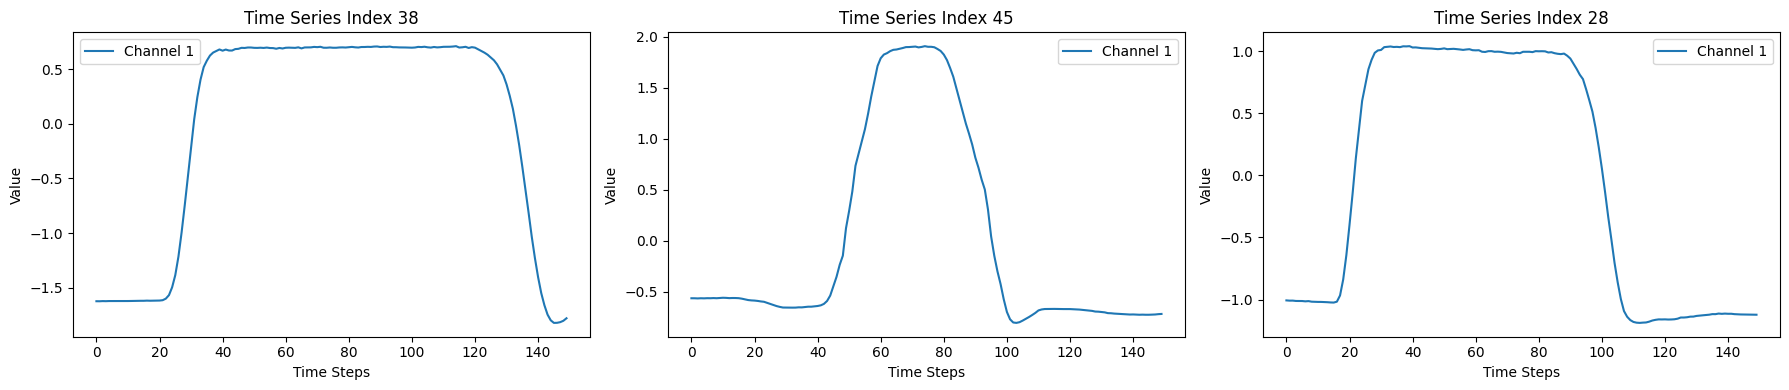

In [36]:
plot_random_time_series(XtrainC, None, 3)

In [ ]:
# Fit and transform the time series
qt = QT()
qt.fit(XtrainC)
Xt = qt.transform(XtrainC)
print(Xt.shape), print(XtrainC.shape) # So we expanded our fifty time series into 1556 different features

(50, 1556)
(50, 1, 150)


(None, None)

In [40]:
pd.DataFrame(Xt).sample(3)

,0,1,2,3,4,5,6,7,8,9,...,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555
17,-0.950039,-0.925338,-0.859359,-0.747144,-0.670679,-0.644535,-0.643651,-0.641727,-0.640391,-0.638597,...,0.234049,0.266118,0.185045,0.179050,0.315874,0.221233,0.178911,0.191757,0.271668,0.141171
15,-1.164074,-1.161456,-1.158705,-1.156205,-1.137177,-1.128220,-1.120515,-1.062390,-0.918803,-0.832361,...,0.054770,0.034530,0.044563,0.035114,0.029990,0.044716,0.071701,0.036020,0.015484,0.048834
12,-1.406174,-1.339689,-1.325791,-1.306689,-1.291735,-1.178128,-1.028818,-1.007084,-1.001682,-0.996308,...,0.088243,0.030637,0.034552,0.045938,0.023497,0.029261,0.012441,0.042188,0.031015,0.029057


In [ ]:
# Next steps

# Append Static Features

# Weight them according to user weight 

# Train a predictor model of any kind

